# Homework 5
## Jennifer Vo
The purpose of this homework is to work carefully through a numeric/simulted solution to Bayes' Theorem. Bayes' Theorem reads:

$$P(signal|data)=P(data|signal)P(signal)P(data)$$
 
Effectively the goal of this homework (and the lab) is to find  $P(signal|data)$.

Reading through Bayes' theorem it says that given a data reading, the probability it was produced by a given true signal $ (P(signal|data))$ , is equal to the probability of getting a particular data reading given a certain true signal  $(P(data|signal))$  times the probability of the signal having a particular strength  $(P(signal))$ , divided by the probability of each data reading $(P(data))$.

This is just math, so is true. But in practice it is quite subtle how to use this. A few pointers:

- P(signal|data)  is what we want to know. What was the probability distribution of the true signal given the measurement we have? Unfortunately it is hard to calculate from first principles.
- P(data|signal)  Is usually easy to determine. If we have a signal-free background (see first 4 weeks of this class), we can inject fake signals of known strength and then simulate the observations in the presence of known (fake) signals. This means we can easily generate  P(data|signal) .
- P(signal)  is called a prior. It is the probability the signal has a particular strength. Priors can be used to great effect, such as in combining the results of multiple particle physics experiments. But it is also the source of 90\% of all statistical mistakes. It is incredibly dangerous. Almost all of the time—and always in this class—we will want a weak/uniform prior. One of the most dangerous bits of using Bayes' Theorem is that it is easy to have an implicit prior which will give you the wrong answer and you don't know why.
- P(data)  in the denominator is almost always just a normalization factor, and is often dropped. This means the result will have to be renormalized, usually by making sure the full  P(signal|data)  integrates to one.

So the homework is to numerically work through this equation.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import math

#this sets the size of the plots to something useful
plt.rcParams["figure.figsize"] = (10,8)

## Problem 1

### Part A
First start by throwing a signal-free background. For Problem 1 choose a Normal distribution with some modest  σ , say in the range 2-5. Create a million background events.

Now we need to make some signal. Let us choose to make signals of random strength on the interval of 0-20. Now it is critically important that you throw these using a uniform distribution. A uniform distribution means that the signal is equally likely to be small/faint (near zero) as large/bright (near 20). Mathematically this is the P(signal) in the equation. If you use another way of simulating signals that does not have a uniform distribution, you are injecting an implicit prior (very, very bad).

Now add your signal to your background to create fake data readings. Since you know what the true signal was for each data reading, and you used a flat prior, you now have  P(data|signal)P(signal).

Now make one of the 2D histograms as shown in class. Here we want to histogram the signal vs. the simulated data readings. There are a couple of ways to do this, but it will be easier later if you define your bin edges explicitly, make a histogram, then plot it.

I will choose a distribution which is normal with a standard deivation of 2, and I will generate 1 million signals randomly chosen (uniformly) between 0 and 20. My histogram observed data will range from -7 to 27 and my true signal ranges from 0 to 20.

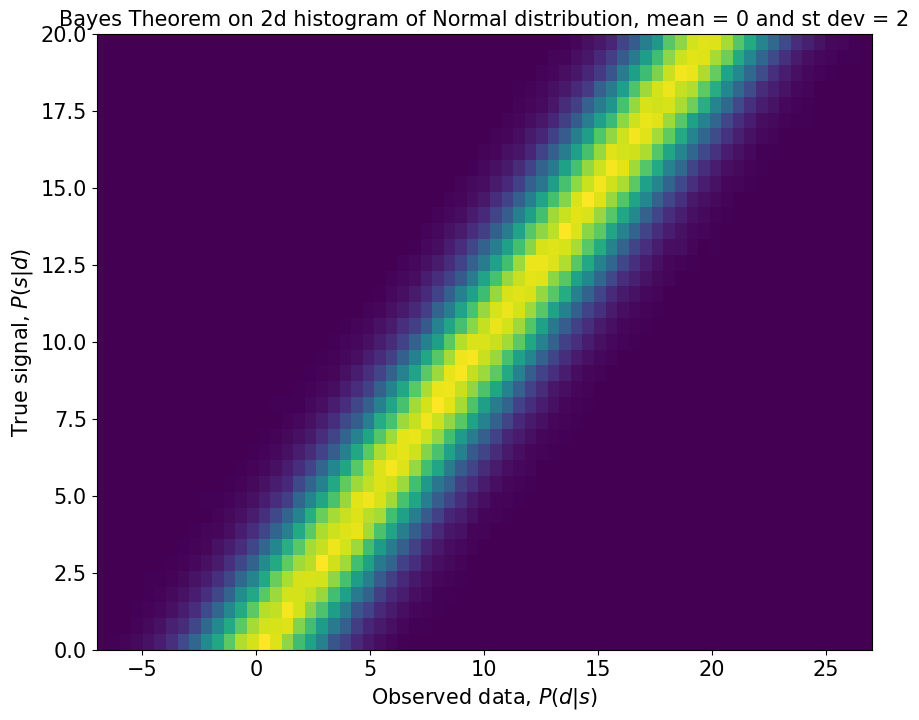

In [54]:
# Create a million background events normally distributed with standard deviation of 2.
std_dev = 2
num = 1000000
bkgd = stats.norm.rvs(loc = 0, scale = std_dev, size = num)

# Make some signals of random strength on interval of 0-20 with a uniform distribution
signal = np.random.uniform(0,20,1000000)

# Add signal to background
data = bkgd + signal # 1 million data points

# Make histogram
# observed signals (data) - x axis edges, bin size is 0.5, total of 68 bins
dataedges = np.linspace(-7,27,68)
# true signals - y axis edges, bin size is 0.5, total of 40 bins
signaledges = np.linspace(0,20,40)

Psd, temp, temp2 = np.histogram2d(data, signal, bins=(dataedges, signaledges), density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2

plt.pcolormesh(datacenters, signalcenters, Psd.T, shading = 'auto')
plt.title(f'Bayes Theorem on 2d histogram of Normal distribution, mean = 0 and st dev = 2', fontsize=15)
plt.tick_params(labelsize=15)
plt.ylabel('True signal, $P(s|d)$', fontsize = 15)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 15)
plt.show()

As we can see, this 2d histogram resembles that in class and represents Bayes' Theorem relating $P(s|d)$ with $P(d|s)$.

### Part B
Now to explore this we can take slices of the above. We can look at our array edges and pick a vertical or horizontal stripe.

Select a true injected signal and plot $P(d|s)$. (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it. [Hint: this was also shown in class.]

Let's select for instance a true injected signal of 10. I want to plot a horizontal stripe that represents $P(d|s)$.

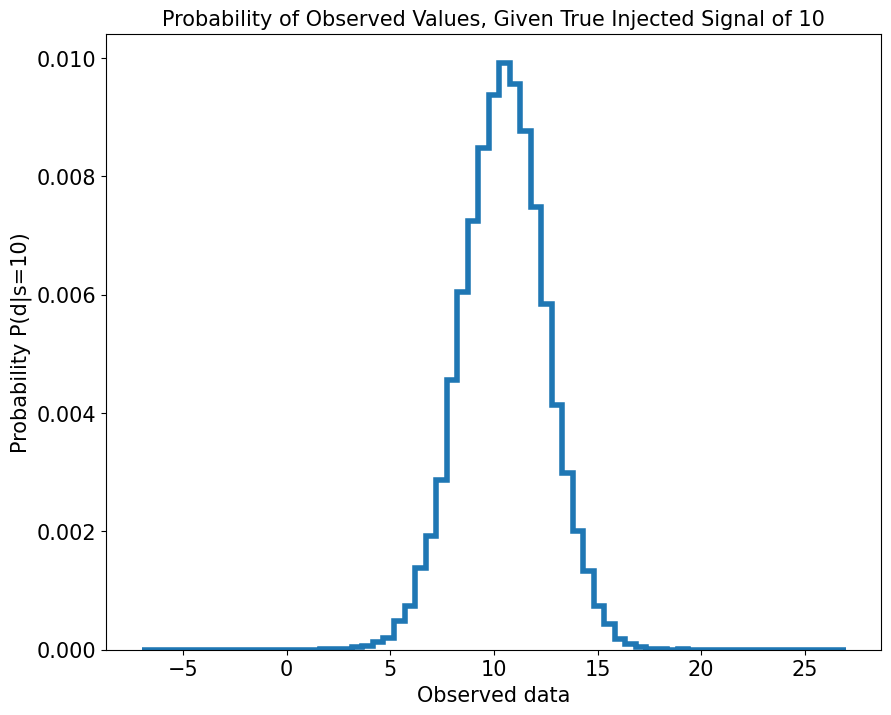

In [55]:
# First let's define our injected signal
inj_signal = 10

# Next, find the bin index in signaledges
bin_signal = np.digitize(inj_signal, signaledges)
    
# Grab only the observed data associated with injected signal bin
# Psd is the 2d histogram with x = observed and y = signals
prob_signal = Psd[:, bin_signal]

plt.stairs(prob_signal, edges = dataedges, linewidth = 4)
plt.title(f'Probability of Observed Values, Given True Injected Signal of 10', fontsize=15)
plt.tick_params(labelsize=15)
plt.ylabel('Probability P(d|s=10)', fontsize = 15)
plt.xlabel('Observed data', fontsize = 15)
plt.show()

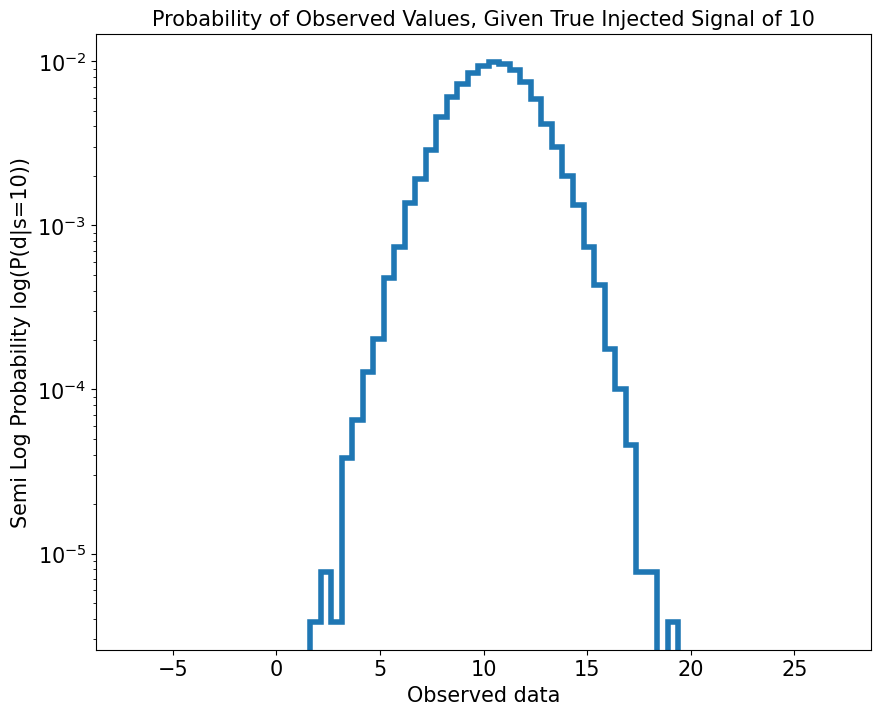

In [56]:
plt.stairs(prob_signal, edges = dataedges, linewidth = 4)
plt.tick_params(labelsize=15)
plt.ylabel('Semi Log Probability log(P(d|s=10))', fontsize = 15)
plt.xlabel('Observed data', fontsize = 15)
plt.yscale('log')
plt.title(f'Probability of Observed Values, Given True Injected Signal of 10', fontsize=15)
plt.show()

I have taken a horizontal slice of my 2d histogram at a true signal of 10, this gathers all of the observed data associated with a true signal of 10 and I was able to plot this on a stair style plot. This plot is a symmetrical, normal distribution with a mean at 10. The y axis is probability. Thus, I get a probability distribution of different values I can observe with a true signal of 10. 

This distribution makes sense because my background is normally distributed with a mean of 0, while the signal itself is 10, so the collective probability distribution is the background distribution normal around a mean of 10.

Upon plotting this on a semi-log graph, it is indeed an upside down parabola (characteristic of a Gaussian distribution) as expected.

### Part C
Select an observed data value and plot  P(s|d) . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it.

Now let's try a vertical stripe. I will select an observed data value of 10, and plot the true signals that could result in this observation.

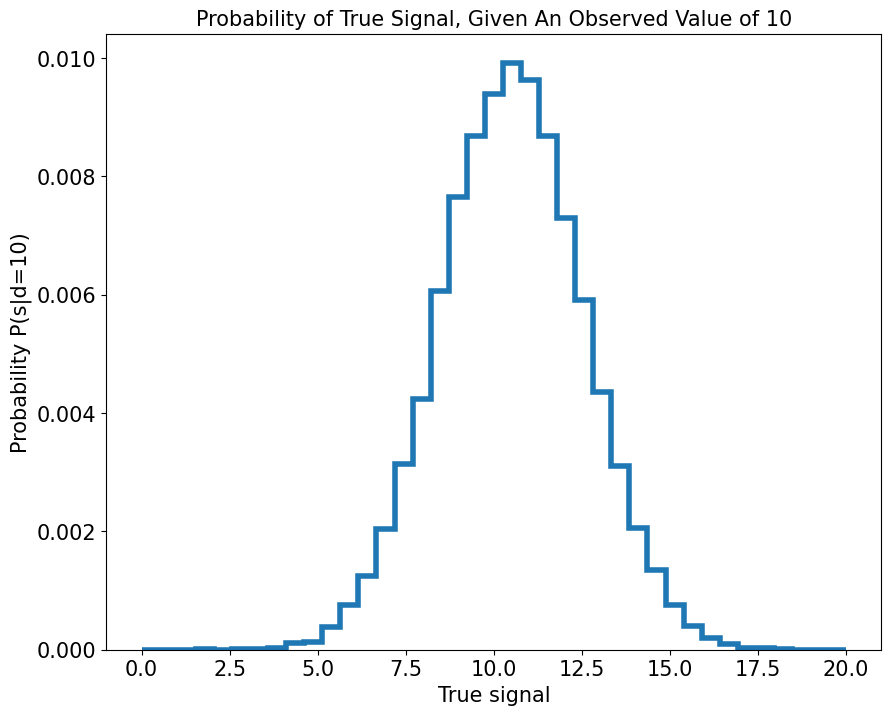

In [57]:
# First let's define our observed signal
obv_signal = 10 

# Next, find the bin index in dataedges
bin_obv = np.digitize(obv_signal, dataedges)
    
# Grab only the true signal data associated with observed signal bin
# Psd is the 2d histogram with x = observed and y = signals
prob_signal = Psd[bin_obv, :]

plt.stairs(prob_signal, edges = signaledges, linewidth = 4)
plt.title(f'Probability of True Signal, Given An Observed Value of 10', fontsize=15)
plt.tick_params(labelsize=15)
plt.ylabel('Probability P(s|d=10)', fontsize = 15)
plt.xlabel('True signal', fontsize = 15)
plt.show()

I have taken a vertical slice of my 2d histogram at an observed data of 10, this gathers all of the true signals associated with an observation of 10 and I was able to plot this on a stair style plot. This plot is a symmetrical, normal distribution with a mean at 10. The y axis is probability. Thus, I get a probability distribution of different true signals that could produce an observation of 10.

This distribution makes sense because to receive an observation of 10 I would most likely have a true signal of 10 (since the background has a mean of zero), however I could also observe 10 with a true signal of less or greater than 10 _because_ the background is normally distributed. For instance, a true signal of 12.5 could also produce an observation of 10 but with smaller probability, and a true signal of 15 could also produce an observation of 10 but with even less probability. Thus, the probability distribution is normally distributed with a mean at 10.

## Problem 2

Now repeat the above, but with a background with non-zero mean. The easiest way would be to still have Guassian distribution but with a non-zero mean. [Hint: move it by at least a couple of  σ ]. Reproduce the graphs above. Lastly overplot the  P(d|s)  and  P(s|d)  plots. Why are they not centered on the same value? Explain carefully.

I will start with a background with a mean of 5 and the same standard deviation of 2.

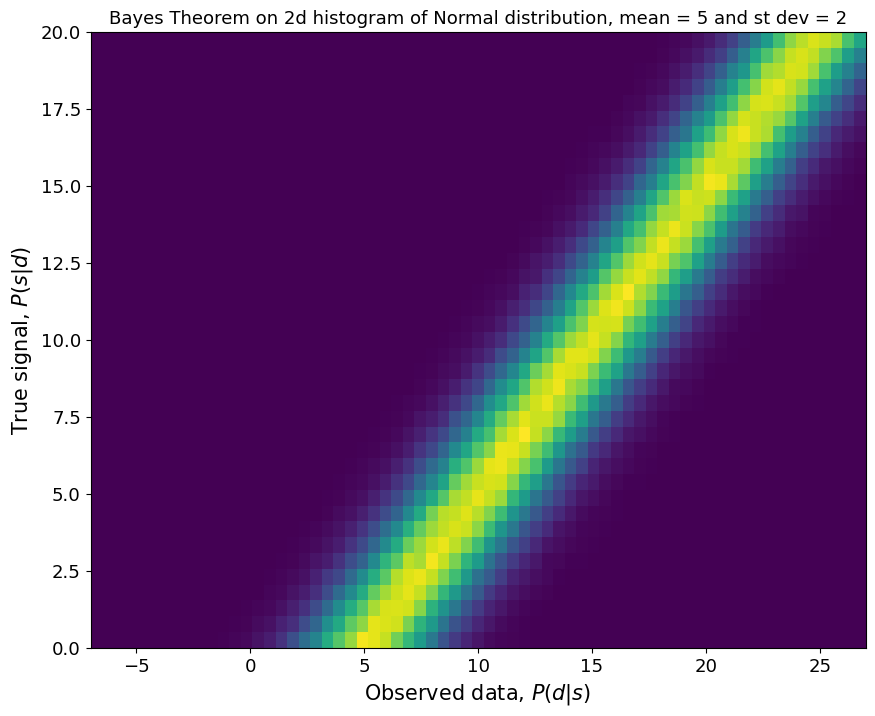

In [64]:
# Create a million background events normally distributed with standard deviation of 2.
std_dev = 2
mean = 5
num = 1000000
bkgd2 = stats.norm.rvs(loc = mean, scale = std_dev, size = num)

# Make some signals of random strength on interval of 0-20 with a uniform distribution
signal2 = np.random.uniform(0,20,1000000)

# Add signal to background
data2 = bkgd2 + signal2 # 1 million data points

# Make histogram
# observed signals (data) - x axis edges, bin size is 0.5, total of 68 bins
dataedges2 = np.linspace(-7,27,68)
# true signals - y axis edges, bin size is 0.5, total of 40 bins
signaledges2 = np.linspace(0,20,40)

Psd2, temp, temp2 = np.histogram2d(data2, signal2, bins=(dataedges2, signaledges2), density=True)

datacenters2 = (dataedges2[:-1] + dataedges2[1:]) / 2
signalcenters2 = (signaledges2[:-1] + signaledges2[1:]) / 2

plt.pcolormesh(datacenters2, signalcenters2, Psd2.T, shading = 'auto')
plt.title(f'Bayes Theorem on 2d histogram of Normal distribution, mean = 5 and st dev = 2', fontsize=13)
plt.tick_params(labelsize=13)
plt.ylabel('True signal, $P(s|d)$', fontsize = 15)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 15)
plt.show()

Now I will reproduce the same graphs as in problem 1. First, I will create the graph of observed data given a true signal of 10:

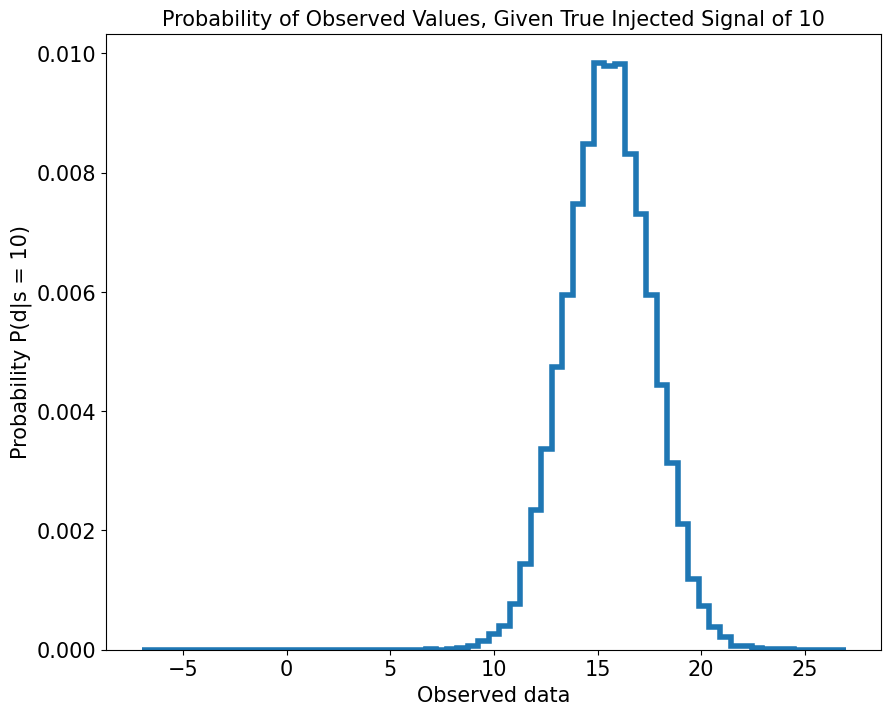

In [65]:
# First let's define our injected signal
inj_signal2 = 10

# Next, find the bin index in signaledges
bin_signal2 = np.digitize(inj_signal2, signaledges2)
    
# Grab only the observed data associated with injected signal bin
# Psd is the 2d histogram with x = observed and y = signals
prob_signal2_obv = Psd2[:, bin_signal2]

plt.stairs(prob_signal2_obv, edges = dataedges2, linewidth = 4)
plt.title(f'Probability of Observed Values, Given True Injected Signal of 10', fontsize=15)
plt.tick_params(labelsize=15)
plt.ylabel('Probability P(d|s = 10)', fontsize = 15)
plt.xlabel('Observed data', fontsize = 15)
plt.show()

I have again taken a horizontal slice of my 2d histogram at a true signal of 10, which gathers all of the observed data associated with a true signal of 10 and I then plotted this on a stair style plot. This plot is a symmetrical, normal distribution with a mean at 15 and I get a probability distribution of different values I can observe with a true signal of 10. 

Now, the probability distribution of observed data for a true signal of 10 is not centered at 10, because the background has a mean of 5. This means with no signal, I would get readings normally distributed around 5. Having a true signal of 10 would shift all of these readings up by 10. Therefore, I get a normal distribution with a mean at 10 + 5 = 15. This is exactly what I see.

Now let's take a vertical slice at an observation of 10:

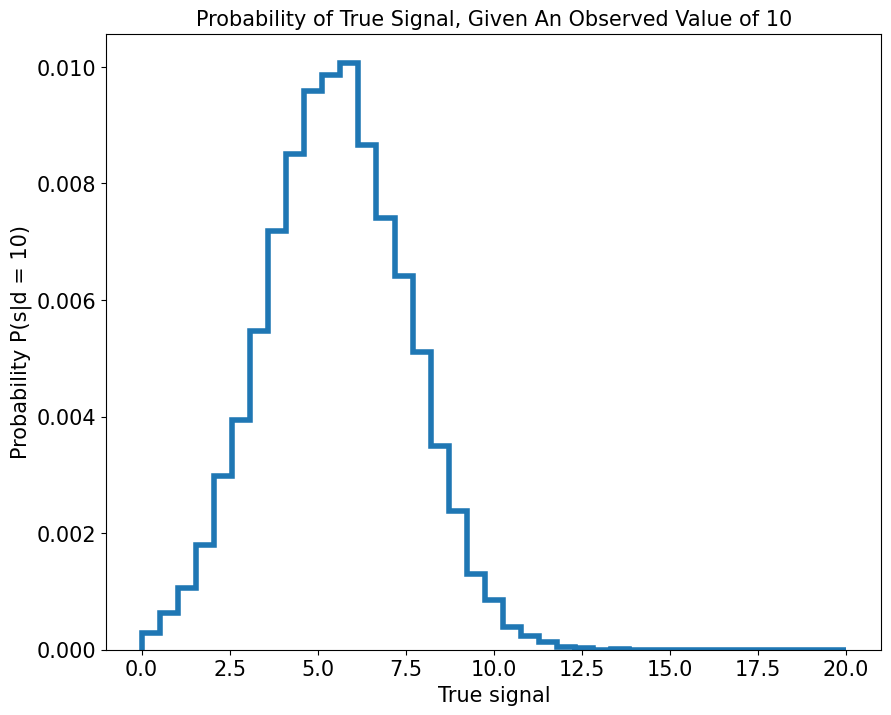

In [66]:
# First let's define our observed signal
obv_signal2 = 10

# Next, find the bin index in dataedges
bin_obv2 = np.digitize(obv_signal2, dataedges2)
    
# Grab only the true signal data associated with observed signal bin
# Psd is the 2d histogram with x = observed and y = signals
prob_signal2_true = Psd2[bin_obv2, :]

plt.stairs(prob_signal2_true, edges = signaledges2, linewidth = 4)
plt.title(f'Probability of True Signal, Given An Observed Value of 10', fontsize=15)
plt.tick_params(labelsize=15)
plt.ylabel('Probability P(s|d = 10)', fontsize = 15)
plt.xlabel('True signal', fontsize = 15)
plt.show()

I have again taken a vertical slice of my 2d histogram at an observed data of 10, this gathers all of the true signals associated with an observation of 10 and I was able to plot this on a stair style plot. This plot is a symmetrical, normal distribution with a mean at 5. The y axis is probability. Thus, I get a probability distribution of different true signals that could produce an observation of 10.

This distribution makes sense because to receive an observation of 10 I would most likely have a true signal of 5 (since the background has a mean of 5, and 5 + 5 = 10). however I could also observe 10 with a true signal of less or greater than 10 because the background is normally distributed. A true signal of 7.5 could also produce an observation of 10 but with smaller probability (a true signal of 7.5 will most likely produce a reading of 12.5) and a true signal of 10 could also produce an observation of 10 but with even less probability (a true signal of 10 would most likely produce a reading of 15, as I plotted above).

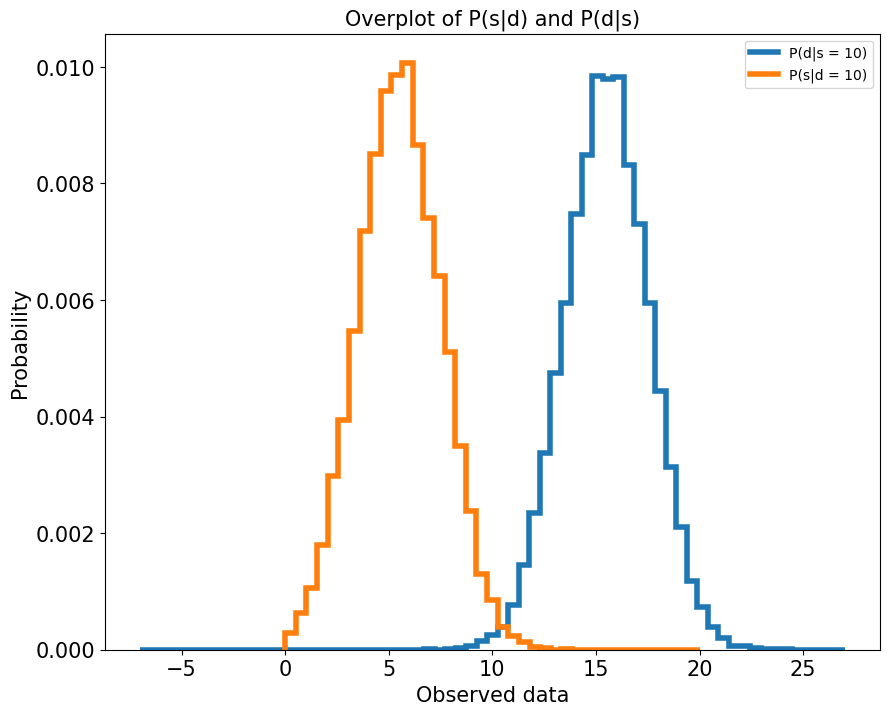

In [67]:
plt.stairs(prob_signal2_obv, edges = dataedges2, linewidth = 4, label = 'P(d|s = 10)')
plt.stairs(prob_signal2_true, edges = signaledges2, linewidth = 4, label = 'P(s|d = 10)')
plt.title(f'Overplot of P(s|d) and P(d|s)', fontsize=15)
plt.tick_params(labelsize=15)
plt.ylabel('Probability', fontsize = 15)
plt.xlabel('Observed data', fontsize = 15)
plt.legend()
plt.show()

In this plot, I have overlayed the previous two plots. P(d|s=10) and P(s|d=10) are not centered on the same value because the background has a non-zero mean of 5. If the background had a mean of 0, the two plots would be centered with approximately the same shape. However, because the background has a non-zero mean, all observations have a P(s|d) that is not cenetered at the observed value, and all true signals have a P(d|s) that is not centered at the signal value. However, both plots are normally distributed because the background is normally distributed.